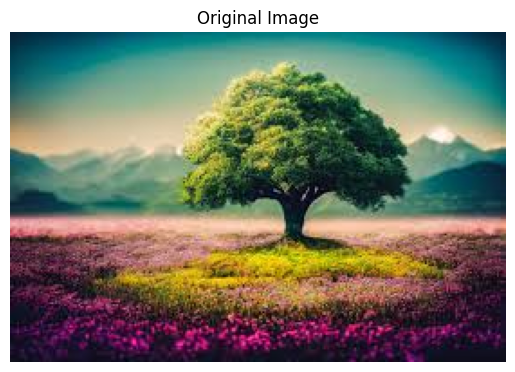

Error occurred: name 'bitwise_and' is not defined


Traceback (most recent call last):
  File "C:\Users\SEC\anaconda3\envs\dip2\lib\site-packages\IPython\core\interactiveshell.py", line 3528, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SEC\AppData\Local\Temp\ipykernel_1888\337821230.py", line 15, in <module>
    bitwise_and
NameError: name 'bitwise_and' is not defined


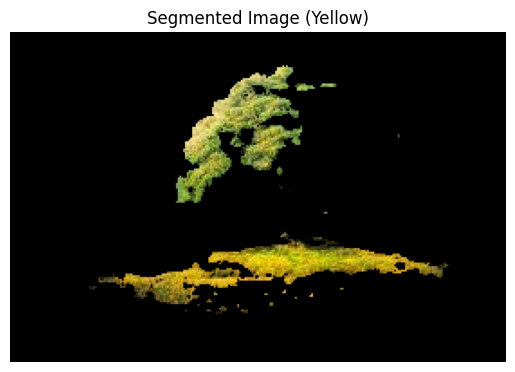

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = 'nature.jpeg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([22, 93, 0])#choose the RGB values accordingly to display specific color
upper_yellow = np.array([45, 255, 255])
mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)
bitwise_and 
segmented_image = cv2.bitwise_and(img, img, mask=mask)
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_image_rgb)
plt.title('Segmented Image (Yellow)')
plt.axis('off')
plt.show()

In [3]:
get_ipython().system('pip install opencv-python numpy matplotlib')
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_handwriting(image_path):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)regions
    min_area = 100
    text_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    img_copy = img.copy()
    for contour in text_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Handwriting Detection')
    plt.axis('off')
    plt.show()
image_path = 'quote.jpeg'
detect_handwriting(image_path)

SyntaxError: invalid syntax (3517314530.py, line 12)

Error occurred: <class 'cv2.dnn.DetectionModel'> returned a result with an error set
Error occurred: [Errno 2] No such file or directory: 'Labels.txt'
[]
0
Error occurred: name 'model' is not defined
Error occurred: name 'model' is not defined
Error occurred: name 'model' is not defined
Error occurred: name 'model' is not defined
Error occurred: name 'model' is not defined
Error occurred: name 'ClassIndex' is not defined
Error occurred: name 'ClassIndex' is not defined


cv2.error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1138: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "frozen_inference_graph.pb" in function 'cv::dnn::ReadProtoFromBinaryFile'


The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\SEC\anaconda3\envs\dip2\lib\site-packages\IPython\core\interactiveshell.py", line 3528, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SEC\AppData\Local\Temp\ipykernel_1888\1735160093.py", line 4, in <module>
    model=cv2.dnn_DetectionModel(frozen_model,config_file)
SystemError: <class 'cv2.dnn.DetectionModel'> returned a result with an error set
Traceback (most recent call last):
  File "C:\Users\SEC\anaconda3\envs\dip2\lib\site-packages\IPython\core\interactiveshell.py", line 3528, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SEC\AppData\Local\Temp

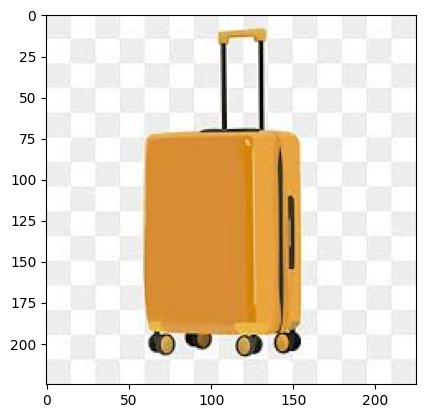

In [4]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

model=cv2.dnn_DetectionModel(frozen_model,config_file)

classLabels = []
file_name='Labels.txt'
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

print(classLabels)
print(len(classLabels))
img=cv2.imread('suitcase.jpeg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,0,255),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,0,0),thickness=1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))